In [1]:
%load_ext google.cloud.bigquery


# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 12 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2009.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [2]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  7.24rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39730,99999,1929,10,20,52.799999,4,45.500000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,18,47.500000,4,44.000000,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,37770,99999,1931,4,24,50.200001,4,44.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,726810,24131,1931,6,23,65.099998,24,41.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,726810,24131,1931,3,2,42.799999,24,31.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,726810,24131,1931,9,17,67.000000,24,40.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
6,726810,24131,1931,8,7,68.400002,24,37.200001,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1932,7,14,64.099998,24,54.099998,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
8,726810,24131,1932,10,23,41.099998,24,31.000000,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,726810,24131,1932,1,5,24.600000,24,21.100000,8.0,NaN,...,NaN,None,NaN,NaN,True,True,True,True,True,True


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [20]:
from google.cloud import bigquery
client = bigquery.Client()
QUERY = """
    SELECT 
    CAST (CONCAT(CAST(year AS STRING), '-' , CAST(month AS STRING) , '-'  , CAST(day AS STRING))
    AS DATE) AS repaired_date,* EXCEPT(year,month,day)
    FROM bigquery-public-data.samples.gsod 
    WHERE year BETWEEN 2005 AND 2010 AND station_number BETWEEN 725300 AND 726300
    ORDER BY repaired_date
"""
df = client.query(QUERY).to_dataframe()
df.head(10)


/Users/eyarhouma/code-challenges/weather_forecast/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/eyarhouma/code-challenges/weather_forecast/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service a

,repaired_date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-01-01,725835,99999,28.400000,4,24.299999,4.0,NaN,NaN,NaN,...,NaN,None,0.09,7.1,False,False,False,False,False,False
1,2005-01-01,725512,99999,29.100000,24,19.700001,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,False,False,False,False,False,False
2,2005-01-01,725467,99999,34.599998,24,25.700001,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
3,2005-01-01,725373,99999,38.799999,24,31.400000,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
4,2005-01-01,725486,99999,23.799999,24,15.600000,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
5,2005-01-01,725628,99999,30.299999,24,22.600000,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
6,2005-01-01,725407,99999,24.100000,24,16.600000,24.0,1029.300049,21.0,NaN,...,NaN,None,0.00,NaN,False,False,False,False,False,False
7,2005-01-01,725366,14825,42.200001,24,36.000000,24.0,1027.800049,23.0,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
8,2005-01-01,725520,14935,27.700001,24,18.700001,24.0,1020.099976,21.0,NaN,...,NaN,None,0.01,NaN,True,True,True,True,True,True
9,2005-01-01,726060,14764,43.500000,24,34.400002,24.0,1019.200012,24.0,NaN,...,NaN,None,0.01,NaN,False,False,False,False,False,False


### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [21]:
df = df.loc[(df['station_number'] >= 725300) & (df['station_number']) <= 725330]
df


,repaired_date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-01-01,725835,99999,28.400000,4,24.299999,4.0,NaN,NaN,NaN,...,NaN,None,0.09,7.1,False,False,False,False,False,False
1,2005-01-01,725512,99999,29.100000,24,19.700001,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,False,False,False,False,False,False
2,2005-01-01,725467,99999,34.599998,24,25.700001,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
3,2005-01-01,725373,99999,38.799999,24,31.400000,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
4,2005-01-01,725486,99999,23.799999,24,15.600000,24.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399708,2010-04-16,725533,94957,61.099998,9,58.400002,9.0,1021.700012,5.0,NaN,...,NaN,None,0.66,NaN,False,False,False,False,False,False
399709,2010-04-16,725541,4993,60.000000,10,56.700001,10.0,NaN,NaN,980.900024,...,NaN,None,0.00,NaN,False,False,False,False,False,False
399710,2010-04-16,726184,94709,37.000000,10,NaN,NaN,NaN,NaN,1016.099976,...,NaN,None,0.00,NaN,False,False,False,False,False,False
399711,2010-04-16,725705,94030,51.799999,9,19.299999,9.0,1019.700012,9.0,842.400024,...,NaN,None,0.00,NaN,False,False,False,False,False,False


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

## Data Analysis

In [31]:
# Imports
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import pandas as pd
from typing import Any, Dict, Tuple
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import datetime, timedelta

%matplotlib inline


In [23]:
def show_charts_per_features(df:pd.DataFrame ):
    """
    Returns charts of different columns and helps finding number of counts in each column
    """
    df.hist(figsize=(20,16), color = 'b')
    plt.show()
    
def show_descriptive_per_features(df:pd.DataFrame) :
    """
    Generate descriptive statistics for different features, summarizing the central tendency, 
    dispersion and shape of a dataset’s distribution.
    """
    return df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
            .background_gradient(subset=['std'], cmap='Reds')\
             .background_gradient(subset=['50%'], cmap='coolwarm')

def show_features_details(df:pd.DataFrame):
    print(df.info())
    print("----------------------------")
    print(df.shape)
    
def show_all_details(df:pd.DataFrame):
    """
    Generate all details and descriptive statistics for different features
    """
    show_charts_per_features(df)
    show_descriptive_per_features(df)
    show_features_details(df)



/Users/eyarhouma/code-challenges/weather_forecast/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


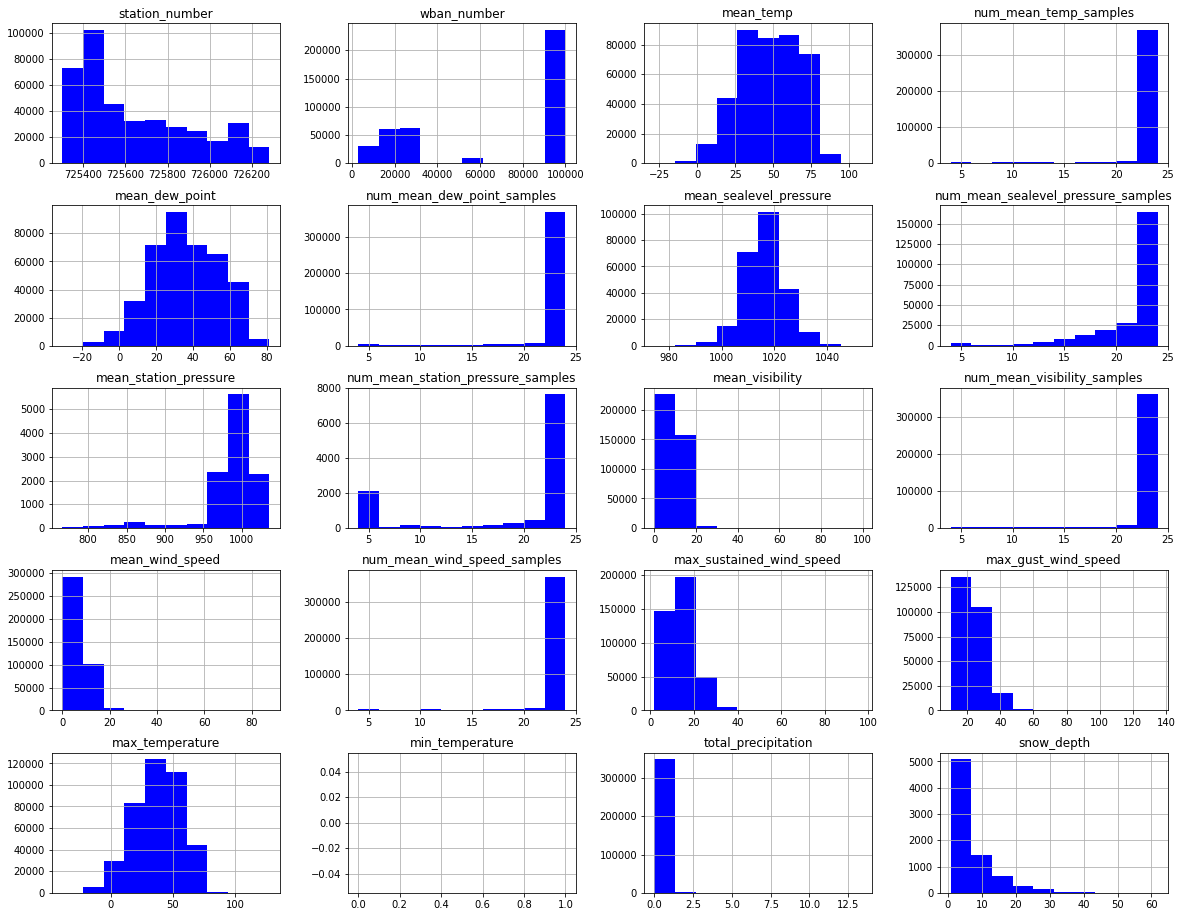

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399713 entries, 0 to 399712
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   repaired_date                       399713 non-null  object 
 1   station_number                      399713 non-null  int64  
 2   wban_number                         399713 non-null  int64  
 3   mean_temp                           399713 non-null  float64
 4   num_mean_temp_samples               399713 non-null  int64  
 5   mean_dew_point                      399550 non-null  float64
 6   num_mean_dew_point_samples          399550 non-null  float64
 7   mean_sealevel_pressure              245472 non-null  float64
 8   num_mean_sealevel_pressure_samples  245472 non-null  float64
 9   mean_station_pressure               11203 non-null   float64
 10  num_mean_station_pressure_samples   11203 non-null   float64
 11  mean_visibility           

In [24]:
show_all_details(df)


## Data extraction

In [25]:
STATION_NUMBER_REF = df["station_number"].min()
STATION_NUMBER_REF

725300

In [26]:
def remove_low_variance(df:pd.DataFrame, threshold:int =0)-> pd.DataFrame:
    """
    Compute the Feature selection through removing low variance 
    """
    # Extract int and float features to calculate variance
    data = df.copy()
    temp_data = data.select_dtypes(include=['int64', 'float64'])

    # Extract features with low variance
    low_variance_filter = VarianceThreshold(threshold= threshold)
    low_variance_filter.fit(temp_data)

    # Extract features with low variance
    data.drop([column for column in temp_data.columns
                        if column !="snow" and column not in temp_data.columns[low_variance_filter.get_support()]], axis=1, inplace=True)
    return data
    
def remove_correlated_features(df:pd.DataFrame, threshold:int =0)-> pd.DataFrame:
    """
    Compute the Feature selection through correlated features 
    """
    data = df.copy()
    # Set of all the names of deleted columns
    col_corr = set() 
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                # getting the name of column
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in data.columns and colname!="snow":
                    # deleting the column from the dataset
                    del data[colname] 

    return data
    
def add_feature_year_month_day(data:pd.DataFrame):
    """
    Extract Year - Month and Day from datetime
    """
    # Extract Year - Month - Day 
    pd.to_datetime(data['repaired_date'])
    data['Day'] = pd.to_datetime(data['repaired_date']).dt.day
    data['Month'] = pd.to_datetime(data['repaired_date']).dt.month
    data['Year'] = pd.to_datetime(data['repaired_date']).dt.year 
    data['Year'] -= data['Year'].min()
    

def feature_engineering(df:pd.DataFrame, threshold:int =0)-> pd.DataFrame:
    """
    Compute some feature engineering 
    1- Compute feature engineering on continous Variables
    2- Compute feature engineering on categorical Variables
    3- Fill NaN values with mean
    4- Drop none usefull features
    5- Add data related features 
    
    """
    
    data = df.copy()
    data = remove_low_variance(data,threshold)
    data = remove_correlated_features(data,threshold)
    
    # Compute Categorical Variables
    data["station_number"] = data["station_number"] - STATION_NUMBER_REF
    
    # Transform bool to int 
    categorical = [var for var in data.columns if data[var].dtype=='bool']
    data[categorical] = data[categorical].astype(int)
    
    # Replace Nan values with their mean 
    data.fillna(data.mean(), inplace=True)
    
    # Remove uncesessary features
    data.drop(['min_temperature_explicit',"max_temperature_explicit","mean_station_pressure","num_mean_station_pressure_samples","wban_number"], axis=1, errors='ignore', inplace=True)

    # Feature Engineering of Date Variable
    add_feature_year_month_day(data)
    
    # Feature scaling 
    
    return data
    
    
df = feature_engineering(df,14)

/Users/eyarhouma/code-challenges/weather_forecast/lib/python3.7/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


/Users/eyarhouma/code-challenges/weather_forecast/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


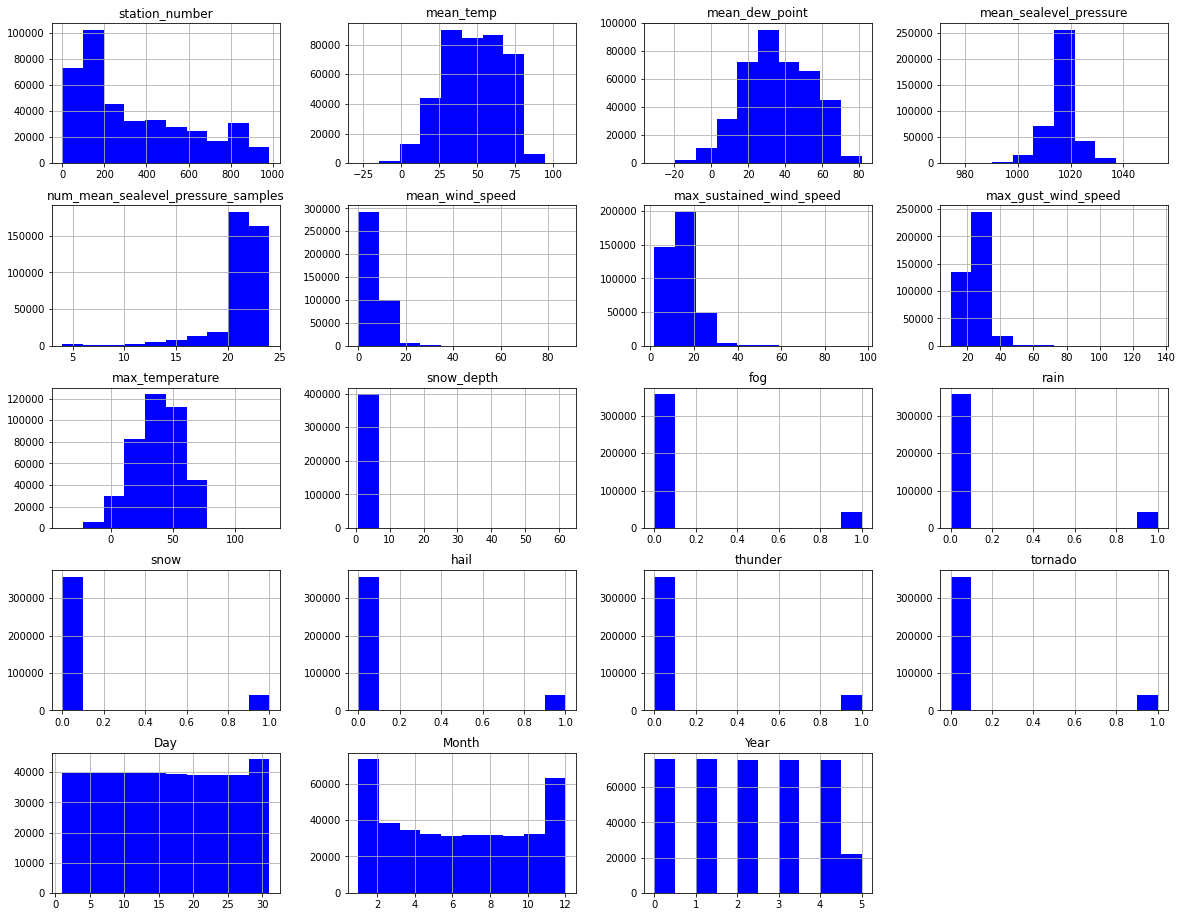

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399713 entries, 0 to 399712
Data columns (total 20 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   repaired_date                       399713 non-null  object 
 1   station_number                      399713 non-null  int64  
 2   mean_temp                           399713 non-null  float64
 3   mean_dew_point                      399713 non-null  float64
 4   mean_sealevel_pressure              399713 non-null  float64
 5   num_mean_sealevel_pressure_samples  399713 non-null  float64
 6   mean_wind_speed                     399713 non-null  float64
 7   max_sustained_wind_speed            399713 non-null  float64
 8   max_gust_wind_speed                 399713 non-null  float64
 9   max_temperature                     399713 non-null  float64
 10  snow_depth                          399713 non-null  float64
 11  fog                       

In [27]:
show_all_details(df)

In [28]:
df.isnull().sum()

repaired_date                         0
station_number                        0
mean_temp                             0
mean_dew_point                        0
mean_sealevel_pressure                0
num_mean_sealevel_pressure_samples    0
mean_wind_speed                       0
max_sustained_wind_speed              0
max_gust_wind_speed                   0
max_temperature                       0
snow_depth                            0
fog                                   0
rain                                  0
snow                                  0
hail                                  0
thunder                               0
tornado                               0
Day                                   0
Month                                 0
Year                                  0
dtype: int64

We can see that out of the total number of RainTomorrow values, No appears 89.43% times and Yes appears 10.57% times.

In [29]:
# check frequency distribution of values in Location variable

df.station_number.value_counts()

670    1930
885    1930
788    1930
185    1930
420    1930
       ... 
410      44
834      12
488      12
346       1
343       1
Name: station_number, Length: 220, dtype: int64

In [32]:
def add_new_columns(df: pd.DataFrame)-> pd.DataFrame:
    tmp = df[["repaired_date","station_number","snow"]]
    shifted = tmp.copy()
    shifted.columns = ["repaired_date","station_number","snow_tomorrow"]
    shifted.repaired_date = shifted.repaired_date + datetime.timedelta(days=1)
    df = df.merge(shifted,on=["repaired_date","station_number"])
    
    shifted.columns = ["repaired_date","station_number","snow_yesterday"]
    shifted.repaired_date = shifted.repaired_date + datetime.timedelta(days=1)
    df = df.merge(shifted,on=["repaired_date","station_number"])
    return df
    
df = add_new_columns(df)

In [33]:
df

,repaired_date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,...,rain,snow,hail,thunder,tornado,Day,Month,Year,snow_tomorrow,snow_yesterday
0,2005-01-03,114,38.799999,37.000000,1016.334571,21.419241,5.5,8.9,23.522961,35.599998,...,1,1,1,1,1,3,1,0,1,0
1,2005-01-03,115,34.599998,33.299999,1016.334571,21.419241,2.6,7.0,23.522961,32.000000,...,1,1,1,1,1,3,1,0,1,0
2,2005-01-03,568,27.600000,27.000000,1016.334571,21.419241,14.8,20.0,23.522961,21.900000,...,0,0,0,0,0,3,1,0,0,1
3,2005-01-03,213,21.400000,18.600000,1016.334571,21.419241,9.6,14.0,16.900000,19.400000,...,1,1,1,1,1,3,1,0,0,1
4,2005-01-03,226,20.100000,14.200000,1016.334571,21.419241,8.7,15.0,23.522961,15.800000,...,0,0,0,0,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393985,2010-04-16,233,61.099998,58.400002,1021.700012,5.000000,4.3,8.9,23.522961,57.900002,...,0,0,0,0,0,16,4,5,0,0
393986,2010-04-16,241,60.000000,56.700001,1016.334571,21.419241,6.0,13.0,17.100000,55.900002,...,0,0,0,0,0,16,4,5,0,0
393987,2010-04-16,884,37.000000,35.948940,1016.334571,21.419241,1.2,5.1,23.522961,33.799999,...,0,0,0,0,0,16,4,5,0,0
393988,2010-04-16,405,51.799999,19.299999,1019.700012,9.000000,4.9,6.0,23.522961,44.099998,...,0,0,0,0,0,16,4,5,0,0


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [34]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]


'2009-06-26'

#### 1 - First method: for splitting the data into train and testset 

In [46]:
def split_data_train_test (df: pd.DataFrame,test_size:float =0.2)-> Tuple[pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame] :
    """ 
    Returns sets to train and test data with their respective predictive value for snow
    This method splits the data using data_seperator: 
    - The dates that previous than data_seperator will be used for training 
    - The dates that successor data_seperator will be used for Testing
    Args: 
        - df: The data that will be split
        - test_size: The percentage the testing data will take
    Returns:
        - X_train: Train data features 
        - X_test: Predictive value for train data
        - y_train: Test data features
        - y_test: Predictive value for test data

    """
    df.to_dict('dict')
    # Extract the date that splits the data 
    data_seperator = df.iloc[int(df.shape[0]*(1-test_size))].repaired_date

    # Extract training Data
    train_data = df.loc[df.repaired_date <= data_seperator]
    
    if isinstance(train_data, pd.DataFrame):
        X_test = train_data["snow_tomorrow"]
        X_train = train_data.drop(["repaired_date","snow_tomorrow"], axis=1, errors='ignore', inplace=True)
        X_train = train_data.to_numpy()
    else:
        X_test = train_data["snow_tomorrow"]
        X_test = train_data["snow_tomorrow"]
  
    # Extract testing Data
    
    test_data = df.loc[df.repaired_date > data_seperator]
    
    if isinstance(test_data, pd.DataFrame):
        y_test = test_data["snow_tomorrow"]
        y_train = test_data.drop(["repaired_date","snow_tomorrow"], axis=1, errors='ignore', inplace=True)
        y_train = test_data.to_numpy()
    else:
        y_test = test_data["snow_tomorrow"]
        y_train = test_data["snow_tomorrow"]
   
    
    return X_train, X_test, y_train, y_test
    
    
X_train, X_test, y_train, y_test = split_data_train_test(df, test_size = 0.2)

In [ ]:
#### 2 - Second method: Randomly divide the data into training and testing 

In [49]:
X = df.drop(['snow_tomorrow','repaired_date'], axis = 1)
y = df['snow_tomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
X_train.shape

(315192, 20)

In [54]:
y_train.shape

(315192,)

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [52]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]


'2009-06-26'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

## Model building


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(1024, input_dim= 20, activation='relu'))
model.add(Dense(712, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))




Epoch 1/50
3152/3152 [==============================] - 21s 4ms/step - loss: 0.2676 - binary_accuracy: 0.9017 - val_loss: 0.2567 - val_binary_accuracy: 0.9033
Epoch 2/50
3152/3152 [==============================] - 13s 4ms/step - loss: 0.2501 - binary_accuracy: 0.9046 - val_loss: 0.2502 - val_binary_accuracy: 0.9042
Epoch 3/50
3152/3152 [==============================] - 14s 5ms/step - loss: 0.2480 - binary_accuracy: 0.9043 - val_loss: 0.2490 - val_binary_accuracy: 0.9045
Epoch 4/50
3152/3152 [==============================] - 14s 5ms/step - loss: 0.2441 - binary_accuracy: 0.9052 - val_loss: 0.2488 - val_binary_accuracy: 0.9048
Epoch 5/50
3152/3152 [==============================] - 31s 10ms/step - loss: 0.2445 - binary_accuracy: 0.9052 - val_loss: 0.2463 - val_binary_accuracy: 0.9056
Epoch 6/50
3152/3152 [==============================] - 17s 5ms/step - loss: 0.2418 - binary_accuracy: 0.9058 - val_loss: 0.2447 - val_binary_accuracy: 0.9049
Epoch 7/50
3152/3152 [=======================

In [ ]:
model.evaluate(X_test, y_test)


In [624]:
model.evaluate(X_train, y_train)

9369/9369 [==============================] - 12s 1ms/step - loss: 8.9719e-11 - binary_accuracy: 1.0000


[8.971862835993605e-11, 1.0]

In [625]:
predictions =(model.predict(X_test)>0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89241
           1       1.00      1.00      1.00     10688

    accuracy                           1.00     99929
   macro avg       1.00      1.00      1.00     99929
weighted avg       1.00      1.00      1.00     99929



In [ ]:
def decode_feature_date(year:int, month:int, day:int):
    """
    Extract date from Year - Month and Day 
    """
    return datetime.date(year=year,day=day,month=month)
    
    

In [ ]:
def predict_classes(df,year,day,month):
    """
    Predict classes of features
    """
    num_stations = df['station_number'].unique()
    for k in range(num_stations):
        predictions = model.predict(X_test.loc[(X_test["num_stations"]==k & X_test["Year"]+ 2005==year & X_test["month"]==month & X_test["day"]==day )])
        
        print(predictions)
        